In [ ]:
pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.0/981.0 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.9 MB/s eta 0:00:00


In [ ]:
!curl -O  https://raw.githubusercontent.com/BloomingPlum/machine_learning/main/time_series_visualisations.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28997  100 28997    0     0   186k      0 --:--:-- --:--:-- --:--:--  187k


In [ ]:
%reload_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from time_series_visualisations import interactive_sales_plot_with_stats, interactive_store_comparison_with_ci, daily_item_dynamics
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
#from darts import TimeSeries
from darts.models import NaiveSeasonal, NaiveDrift
from darts.models import ExponentialSmoothing, AutoARIMA, Theta
from darts.models import ARIMA
from darts.models import Prophet
from darts.metrics import mape
from darts.utils.statistics import plot_acf, check_seasonality
from darts.models import RNNModel
from darts.utils.timeseries_generation import datetime_attribute_timeseries
sns.set()

ModuleNotFoundError: No module named 'darts'

У цьому ДЗ ми попрактикуємось моделювати часові ряди на даних з [Store Item Demand Forecasting Challenge](https://www.kaggle.com/competitions/demand-forecasting-kernels-only/overview). Ми будемо працювати лише з тренувальними даними цього змагання і задача у нас буде дещо змінена. Фокус буде на пошуці найкращої моделі, експериментах і використанні функціоналу `darts`.

Якщо якісно попрацювати в цьому завданні - це буде чудовий приклад проєкту для вашого портфоліо: "спрогнозував(-ла) поденні продажі на 1 міс для 50 товарів в 10 магазинах" звучить вражаюче! Але ми в рамках ДЗ для оптимізації часу сконцентруємось на моделюванні продажів одного товару в одному магазині.

**Задача**

Вам надано дані про продажі товарів у магазинах за 5 років. Хочемо навчитись передачати продажі в наступному місяці поденно кожного з 50 товарів у кожному з 10 магазинів. Відповідно будемо проводити експерименти, аби знайти найкращу модель для цього.

На відміну від змагання, ми будемо використовувати метрику МАРЕ (Mean Absolute Percentage Error) замість SMAPE (Symmetric Mean Absolute Percentage Error). Проте, ви також можете розрахувати SMAPE і подати свої результати через late submission на Kaggle.

1. Завантажуємо дані в Pandas.

  1. Завантажте дані з файлу `train.csv.zip` за допомогою бібліотеки Pandas.
  2. Перетворіть колонку `date` на формат `datetime`.
  3. Встановіть колонку `date` як індекс для датафрейму.
  4. Виведіть перші 10 рядків отриманого датафрейму та інформацію про датафрейм.

In [ ]:
raw_csv_data = pd.read_csv("train.csv.zip")
df = raw_csv_data.copy()

In [ ]:
df.head()

date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10

In [ ]:
# shape of the data
df.shape

(913000, 4)

In [ ]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

In [ ]:
df.date = pd.to_datetime(df.date)

In [ ]:
df.set_index("date", inplace = True)

In [ ]:
df.head(10)

store  item  sales
date                          
2013-01-01      1     1     13
2013-01-02      1     1     11
2013-01-03      1     1     14
2013-01-04      1     1     13
2013-01-05      1     1     10
2013-01-06      1     1     12
2013-01-07      1     1     10
2013-01-08      1     1      9
2013-01-09      1     1     12
2013-01-10      1     1      9

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   store   913000 non-null  int64
 1   item    913000 non-null  int64
 2   sales   913000 non-null  int64
dtypes: int64(3)
memory usage: 27.9 MB


In [ ]:
df.nunique()

store     10
item      50
sales    213
dtype: int64

  2. Давайте трошки зрозуміємо дані. У нас 10 магазинів і 50 айтемів в кожному. Хочемо зрозуміти, чи відрізняється динаміка по кожному айтему в магазинах. Як би ви це візуалізували? Побудуйте 3 графіка, які вам допоможуть. Можна використати будь-який інструмент: matplotlib, seaborn, plotly.

  Напишіть висновок з побудованих вами візуалізацій.
  
    **Підказка**: я б спробувала вивести середнє значення і довірчий інтервал (який включає весь діапазон значень з різних магазинів) для динаміки кожного айтема, або принаймні для декількох айтемів, аби зрозуміти тенденцію.



<font color='green'> На цьому графіку можна побачити статистику по кожному айтему в магазинах. В цілому тенденція для всіх айтемів схожа - пік продажів припадає на серпень, а найнижча кількість продажів завжди у грудні-січні. </font>

In [ ]:
interactive_sales_plot_with_stats(df)

Output()

<font color='green'> На цьому графіку можна побачити динаміку продажів також в конкретному магазині або порівняти як продається той самий товар в декількох магазинах. Динаміка в цілому схожа, також скрізь прослідковується сезонність. </font>

In [ ]:
interactive_store_comparison_with_ci(df)

<font color='green'> На цьому графіку можна побачити динаміку продажів окремого айтему поденно. Видно, що пік продажів завжди припадає на неділю, а найменше продажів в понеділок.  </font>

In [ ]:
daily_item_dynamics(df)

3. **Для початку проаналізуємо лише один ряд, а далі зможемо зациклити тренування моделей.**
  
  Виберіть підмножину даних, що відповідає продажам товару з `item == 1` у магазині з `store == 1`.

  Зробіть декомпозицію цього рядку за адитивною моделлю на тренд, сезонність і залишки з бібліотекою `statsmodels`.

  Зробіть висновки з отриманих візуалізацій. Чи щось би могло вам допомогти ліпше зрозуміти ці візуалізації? (з точки зору обробки даних)

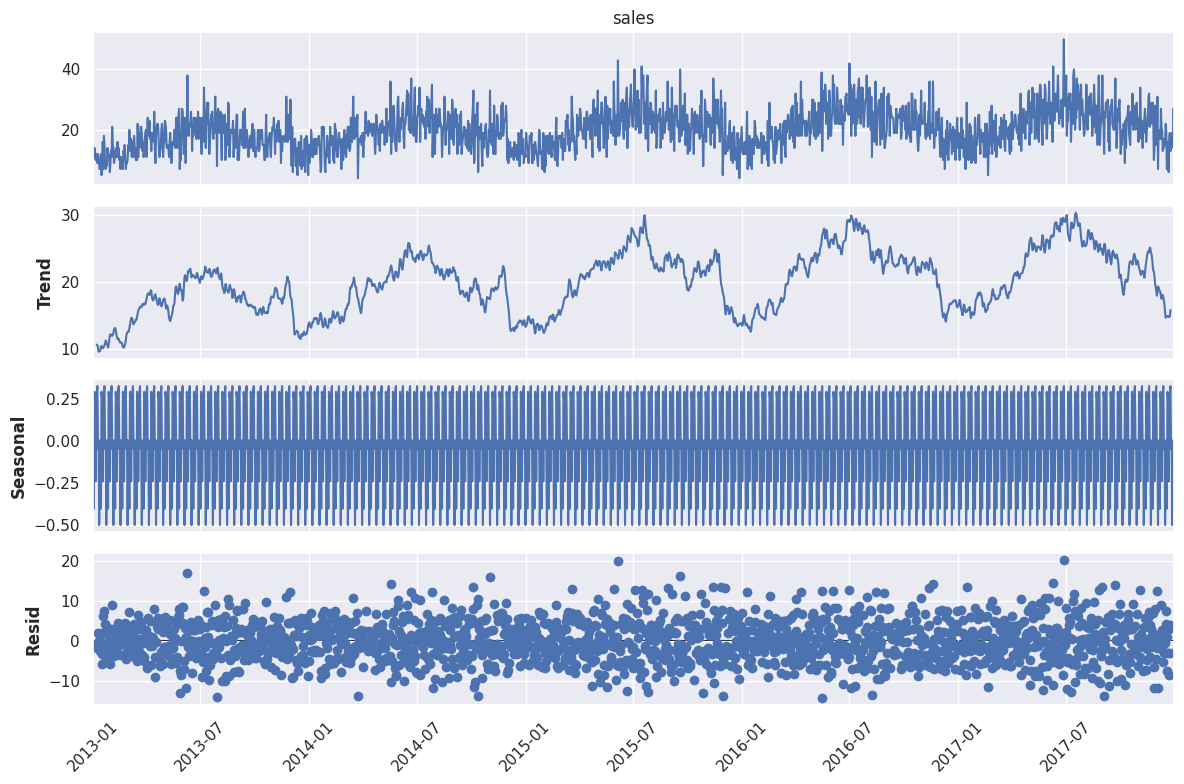

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_subset = df.loc[(df['item'] == 1) & (df['store'] == 1), 'sales']

result = seasonal_decompose(df_subset, model='additive', period=12)

fig = result.plot()

fig.set_size_inches(12, 8)

for ax in fig.axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<font color='green'> На візуалізації видно зростаючий тренд, а також чітко виражену сезонність. В залишках паттерну не прослідковується.  </font>

4. Зі створеної підможини даних в попередньому пункті створіть обʼєкт класу `TimeSeries` в `darts` лише для колонки `sales`.

In [ ]:
# Convert df_subset (Series) to a DataFrame
df_subset_df = df_subset.to_frame(name='sales')

# Create the TimeSeries object
series = TimeSeries.from_dataframe(
    df_subset_df,
    value_cols="sales",
    fill_missing_dates=True,
    freq="D"
)

In [ ]:
series

<TimeSeries (DataArray) (date: 1826, component: 1, sample: 1)> Size: 15kB
array([[[13.]],

       [[11.]],

       [[14.]],

       ...,

       [[15.]],

       [[27.]],

       [[23.]]])
Coordinates:
  * date       (date) datetime64[ns] 15kB 2013-01-01 2013-01-02 ... 2017-12-31
  * component  (component) <U5 20B 'sales'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

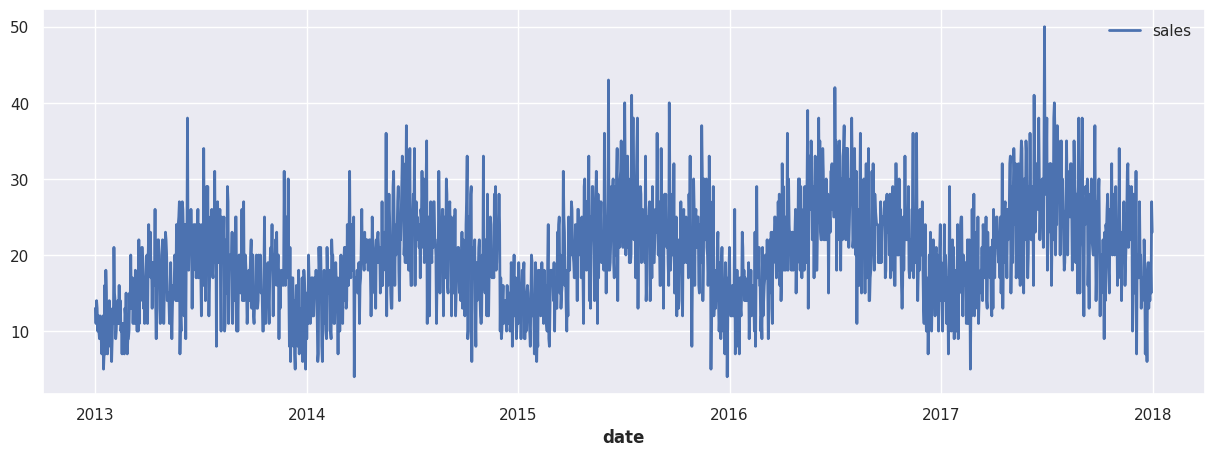

In [ ]:
plt.figure(figsize=(15, 5))
series.plot();

5. Використовуючи метод `series.split_before` розбийте дані на тренування і валідацію так, аби валідація починалась з `2017-10-01` включно.

  Візуалізуйте на одному графіку тренувальну і валідаційну частину як було показано в лекції.

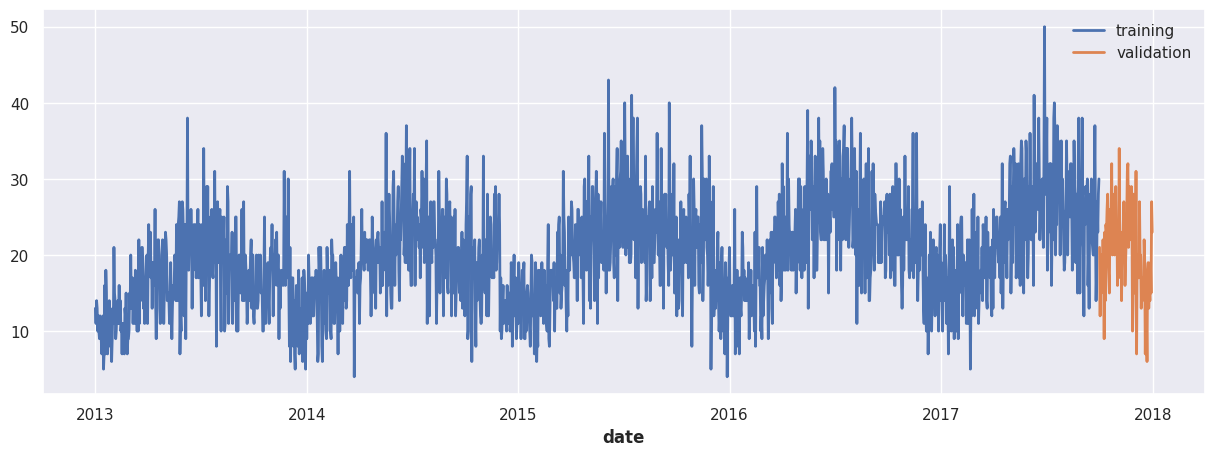

In [ ]:
train, val = series.split_before(pd.Timestamp("2017-10-01"))
plt.figure(figsize=(15, 5))
train.plot(label="training")
val.plot(label="validation");

In [ ]:
#Перевіримо, чи на правильній даті закінчуються тренувальні та починаються валідаційні дані
train.tail(1)

<TimeSeries (DataArray) (date: 1, component: 1, sample: 1)> Size: 8B
array([[[30.]]])
Coordinates:
  * date       (date) datetime64[ns] 8B 2017-09-30
  * component  (component) <U5 20B 'sales'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

In [ ]:
val.head(1)

<TimeSeries (DataArray) (date: 1, component: 1, sample: 1)> Size: 8B
array([[[21.]]])
Coordinates:
  * date       (date) datetime64[ns] 8B 2017-10-01
  * component  (component) <U5 20B 'sales'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

6. Побудуйте часткову автокореляційну функцію для цього нашого ряду в `series`. Напишіть висновки - які лаги є важливими для прогнозування?

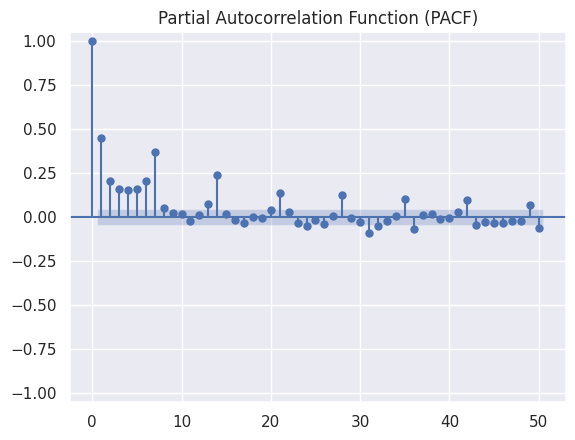

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

# Візуалізація часткової автокореляційної функції (PACF)
plot_pacf(df_subset, lags=50, method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')
plt.ylim(-1.05, 1.05)
plt.show()

<font color='green'> На візуалізації бачимо, що лаги 7, 14, 21 і так далі більш виражені, ніж інші, що говорить про сезонність. Лаги з 2 по 6 також є важливими (не знаходяться на сірому полі), що свідчить про корострокову залежність. </font>

7. Виявіть сезональність тренувального ряду використовуючи фукнкцію `check_seasonality` з `darts`.

<Figure size 3000x600 with 0 Axes>

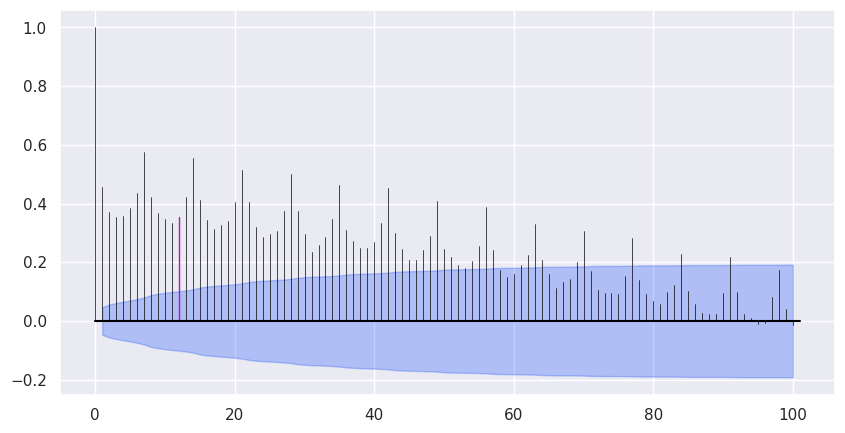

In [ ]:
plt.figure(figsize=(30,6))
plot_acf(train, m=12, alpha=0.05, max_lag=100)

In [ ]:
for m in range(2, 41):
    is_seasonal, period = check_seasonality(train, m=m, max_lag=40, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))

There is seasonality of order 7.
There is seasonality of order 14.
There is seasonality of order 21.
There is seasonality of order 28.
There is seasonality of order 35.


8. Побудуйте наївну модель NaiveSeasonal + NaiveDrift для прогнозування даних. Кількість кроків для прогнозування визначіть зі свого аналізу в попередніх пунктах. Візуалізайте передбачення проти справжніх даних так, аби було видно якість передбачень. Зробіть висновок про модель. Вона точна?

  Якщо у вас є ідеї, як поліпшити якість передбачення саме наївними моделями - реалізуйте їх в цьому пункті :)

In [ ]:
def eval_forecast(model, val, forecast):
  mape_ = mape(val, forecast)
  print(f"model {model} obtains MAPE: {mape_:.2f}%")
  return mape_

def fit_eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    eval_forecast(model, val, forecast)

def plot_results(series, forecast):
    plt.figure(figsize=(15,6))
    plt.plot(series.time_index, series.values(), label='Actual', color='blue')
    plt.plot(forecast.time_index, forecast.values(), label='Forecast', color='red')
    plt.xlim(pd.Timestamp("2017-01-01"), pd.Timestamp("2018-01-01"))
    plt.legend()
    plt.show()

def fit_and_plot(model, series, train, val):
    model.fit(train)
    forecast = model.predict(len(val))
    plot_results(series, forecast)
    eval_forecast(model, val, forecast)

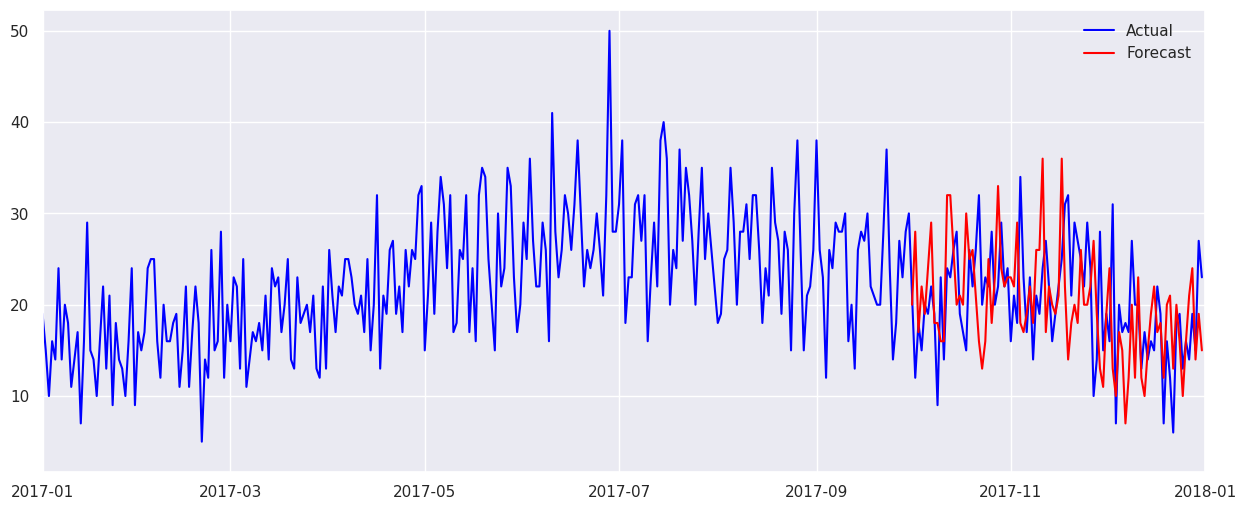

model NaiveSeasonal(K=363) obtains MAPE: 31.09%


In [ ]:
seasonal_model = NaiveSeasonal(K=363)
seasonal_model.fit(train)
seasonal_forecast = seasonal_model.predict(len(val))
fit_and_plot(seasonal_model, series, train, val)

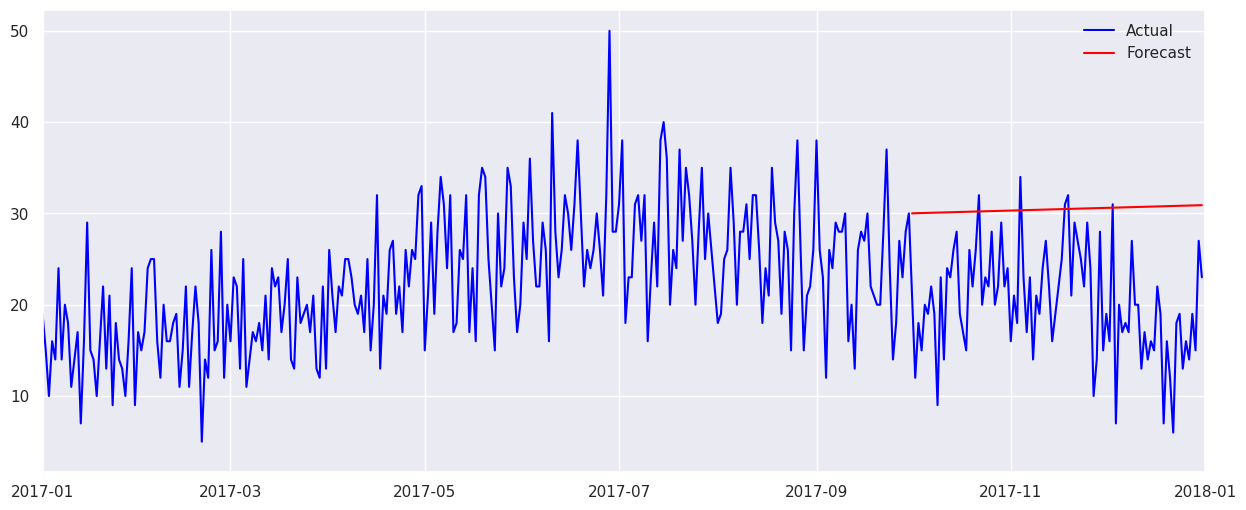

model NaiveDrift() obtains MAPE: 68.74%


In [ ]:
drift_model = NaiveDrift()
drift_model.fit(train)
drift_forecast = drift_model.predict(len(val))
fit_and_plot(drift_model, series, train, val)

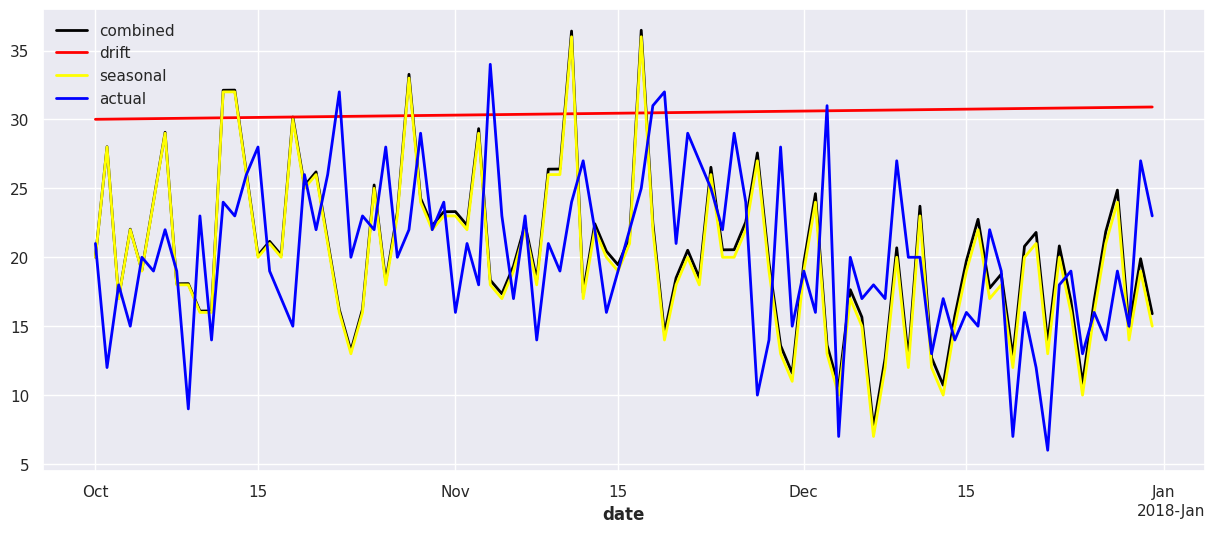

In [ ]:
combined_forecast = drift_forecast + seasonal_forecast - train.last_value()

plt.figure(figsize=(15,6))
combined_forecast.plot(label="combined", color='black')
drift_forecast.plot(label="drift", color='red')
seasonal_forecast.plot(label="seasonal", color='yellow')
val.plot(label="actual", color = "blue")

plt.show()

<font color='green'> Як бачимо, моделі NaiveSeasonal та Combined дають практично однакові передбачення. Модель часто не збігається з реальними даними, але дещо вгадує тренди.  </font>

9. Обчисліть помилку прогнозу на валідації наївною моделлю з mape. Далі для всіх моделей необхідно обчислювати помилку прогнозу на валідації.

In [ ]:
print(f"Mean absolute percentage error for the combined naive drift + naive seasonal: {mape(series, combined_forecast):.2f}%.")
print(f"Mean absolute percentage error for the seasonal forecast: {mape(series, seasonal_forecast):.2f}%.")
print(f"Mean absolute percentage error for the naive drift forecast: {mape(series, drift_forecast):.2f}%.")

Mean absolute percentage error for the combined naive drift + naive seasonal: 31.51%.
Mean absolute percentage error for the seasonal forecast: 31.09%.
Mean absolute percentage error for the naive drift forecast: 68.74%.


10. Натренуйте XBGModel з `darts` для передбачення наших даних. Можна додавати всі додаткові ознаки, які вважаєте за потрібне, наприклад, ознаки з дати. Зробіть висновок про якість моделі.

In [ ]:
from darts.models import XGBModel
from darts.dataprocessing.transformers import Scaler

def enrich_with_date_features(df):
    df['date'] = pd.to_datetime(df.index)  # Convert index to datetime format
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df["sin_day"] = np.sin(df["dayofyear"])
    df["cos_day"] = np.cos(df["dayofyear"])
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week  # Fixing deprecated 'weekofyear'
    return df

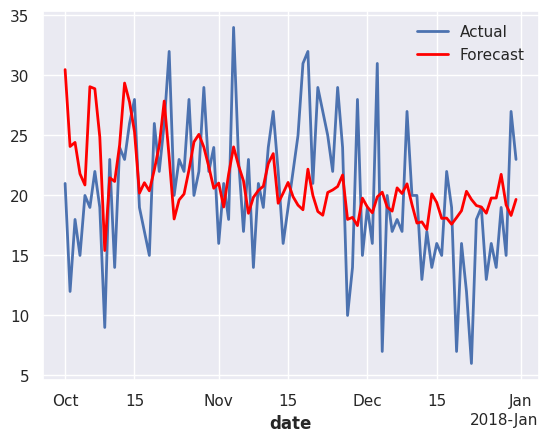

model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) obtains MAPE: 28.26%


28.26248572571982

In [ ]:
# Додавання ознак дати
train_transformed = enrich_with_date_features(train.pd_dataframe().reset_index())
val_transformed = enrich_with_date_features(val.pd_dataframe().reset_index())

# Масштабування даних
scaler = Scaler()
train_transformed = scaler.fit_transform(train)
test_transformed = scaler.transform(val)

# Побудова моделі XGBoost
model = XGBModel(
    lags=14,  # Використання останніх 14 спостережень для прогнозування
    output_chunk_length=1,  # Прогнозування на 1 крок вперед
    n_estimators=1000,  # Кількість дерев у моделі
    max_depth=3,  # Максимальна глибина кожного дерева
    learning_rate=0.1,  # Коефіцієнт навчання
    subsample=0.8,  # Частка даних для випадкової вибірки кожного дерева
    colsample_bytree=0.8  # Частка ознак, що використовуються для кожного дерева
)

# Тренування моделі
model.fit(train_transformed)
pred = model.predict(3)
pred.values()

# Передбачення
forecast = scaler.inverse_transform(model.predict(len(val)))
val.plot(label='Actual')
forecast.plot(label='Forecast', color='red')
plt.legend()
plt.show()
eval_forecast(model, val, forecast)

<font color='green'> Модель частково уловлює загальний тренд, але згладжує піки і спади. </font>

11. Натренуйте модель ExponentialSmoothing та зробіть висновок про її якість.

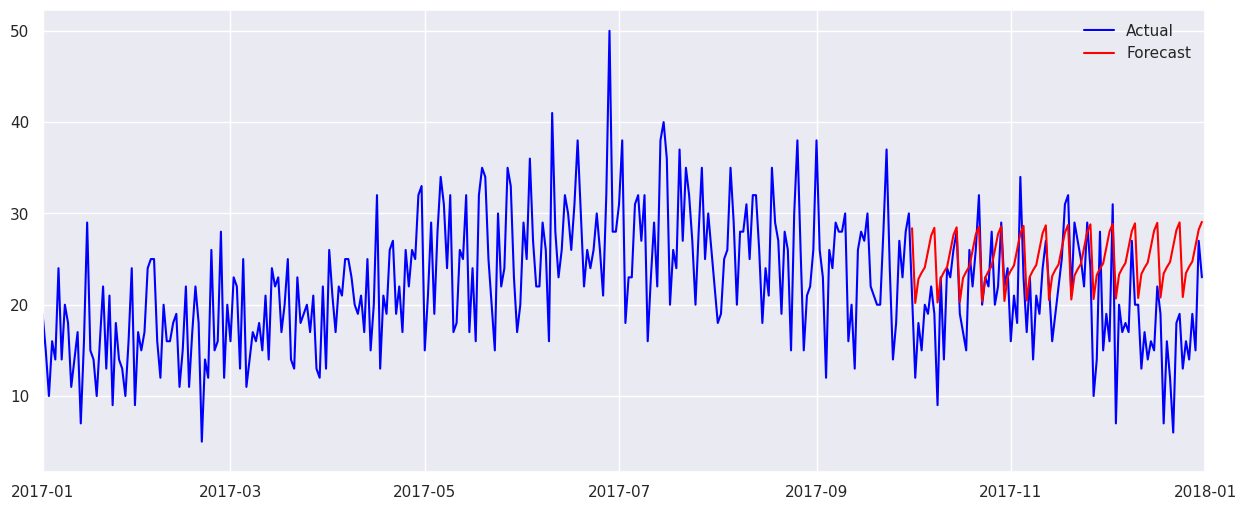

model ExponentialSmoothing() obtains MAPE: 39.01%


In [ ]:
model = ExponentialSmoothing()
fit_and_plot(model, series, train, val)

<font color='green'> Модель достатньо добре уловлює сезонність, але зовсім не уловлює тренд. </font>

12. Натренуйте модель ARIMA, параметри оберіть самостійно.Зробіть висновок про її якість.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


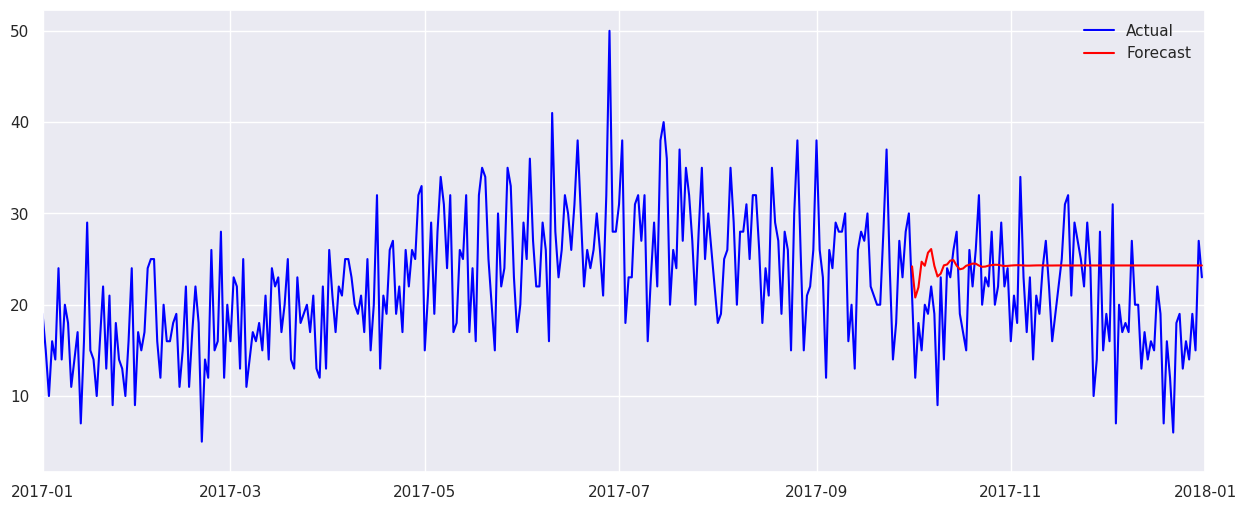

model ARIMA(p=7, q=1) obtains MAPE: 39.53%


In [ ]:
model = ARIMA(p=7, d=1, q=1)
fit_and_plot(model, series, train, val)

<font color='green'> Модель побачила короткостроковий тренд, але прогноз дуже швидко стає постійним. </font>

13. Знайдіть оптимальні параметри моделі ARIMA з допомогою AutoARIMA моделі. Виконайте пошук параметрів, виведіть, які паарметри виявились оптимальними і обчисліть якість моделі. Чи поліпшилась якість порівняно з попереднім експериментом?

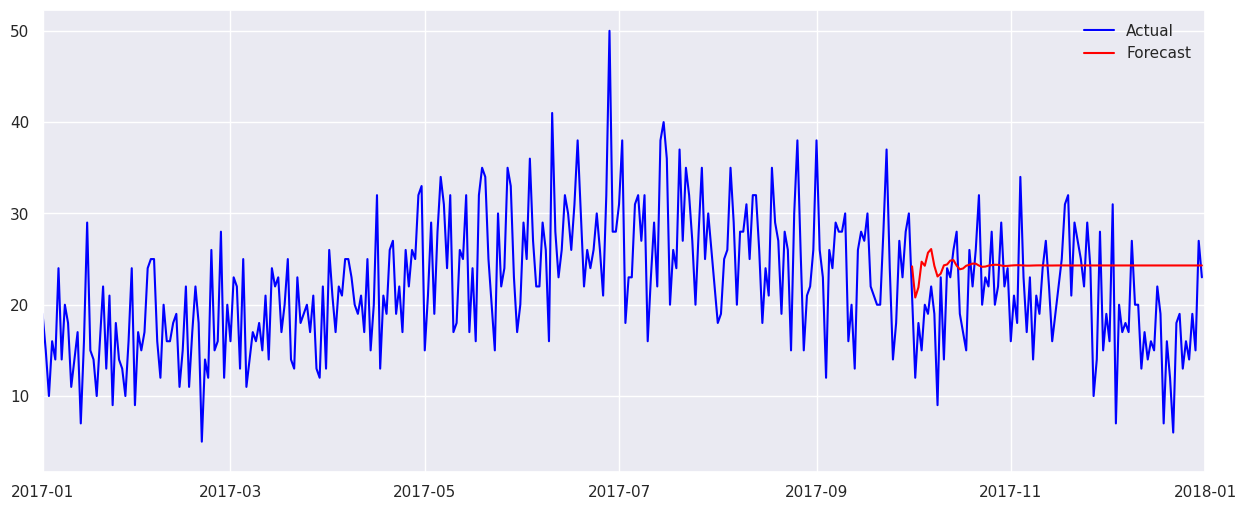

model AutoARIMA(start_p=8, max_p=12, start_q=1) obtains MAPE: 39.53%


In [ ]:
import warnings
import sklearn.utils.deprecation

# Suppress specific deprecation warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", module="sklearn.utils.deprecation")

model = AutoARIMA(start_p=8, max_p=12, start_q=1)
fit_and_plot(model, series, train, val)

In [ ]:
model.model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1734
Model:               SARIMAX(7, 1, 1)   Log Likelihood               -5286.539
Date:                Sun, 16 Mar 2025   AIC                          10591.078
Time:                        22:02:41   BIC                          10640.196
Sample:                             0   HQIC                         10609.244
                               - 1734                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0346      0.038      0.904      0.366      -0.040       0.109
ar.L2         -0.0799      0.034     -2.379      0.017      -0.146      -0.014
ar.L3         -0.0775      0.033     -2.316      0.021      -0.143      -0.012
ar.L4         -0.0651      0.034     -1.939      0.053      -0.131       0.001
ar.L5         -0.0342      0.032     -1.063      0.288      -0.097       0.029
ar.L6          0.0062      0.030      0.207      0.836      -0.053       0.065
ar.L7          0.2638      0.029      9.042      0.000       0.207       0.321
ma.L1         -0.9071      0.026    -34.233      0.000      -0.959      -0.855
sigma2        26.0956      0.820     31.811      0.000      24.488      27.703
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                16.19
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

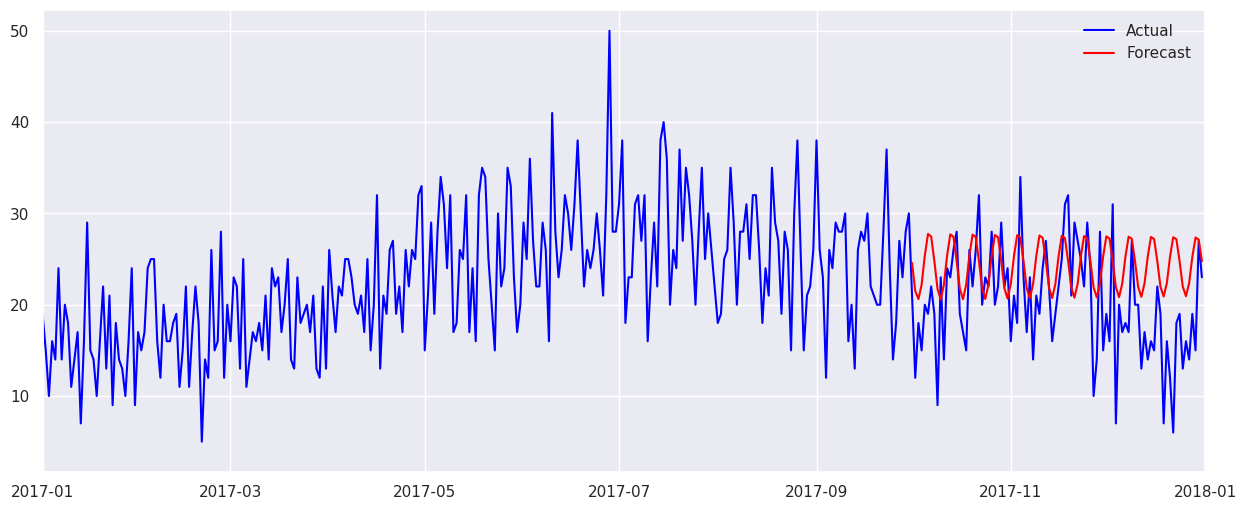

model AutoARIMA(start_p=2, max_p=5, start_q=1, max_q=3) obtains MAPE: 38.25%


In [ ]:
#Після знаходження кращих параметрів модель покращилась, але не значно.
model = AutoARIMA(start_p=2, max_p=5, start_q=1, max_q=3)
fit_and_plot(model, series, train, val)

14. Натренуйте модель Prophet та зробіть висновок про її якість.

In [ ]:
model_prophet = Prophet()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9t7gzswa/x87r7br1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9t7gzswa/369mtbgq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87222', 'data', 'file=/tmp/tmp9t7gzswa/x87r7br1.json', 'init=/tmp/tmp9t7gzswa/369mtbgq.json', 'output', 'file=/tmp/tmp9t7gzswa/prophet_modelx24nezsr/prophet_model-20250316225238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:52:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:52:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


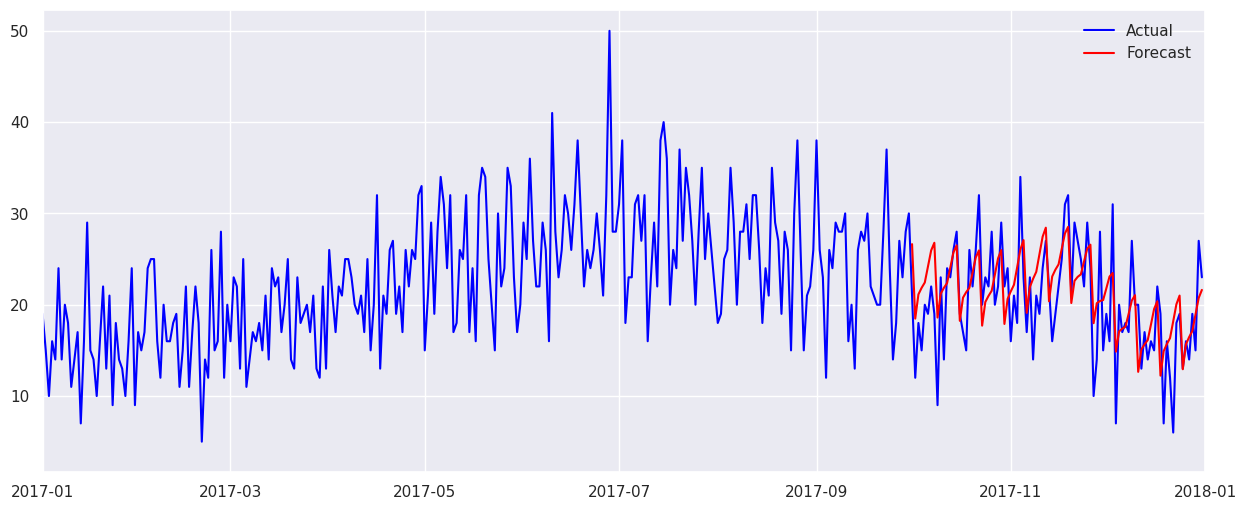

model Prophet() obtains MAPE: 23.80%


In [ ]:
fit_and_plot(model_prophet, series, train, val)

<font color='green'> Якість цієї моделі краща в порівнянні з іншими моделями. Точність не ідеальна, але вгадуються як тренд, так і сезонність.  </font>

15. Натренуйте модель `RNNModel` та зробіть висновок про її якість.

<TimeSeries (DataArray) (date: 1826, component: 1, sample: 1)> Size: 15kB
array([[[13.]],

       [[11.]],

       [[14.]],

       ...,

       [[15.]],

       [[27.]],

       [[23.]]])
Coordinates:
  * date       (date) datetime64[ns] 15kB 2013-01-01 2013-01-02 ... 2017-12-31
  * component  (component) <U5 20B 'sales'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 1.8 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
1.9 K     Trainable params
0         Non-trainable params
1.9 K     Total params
0.007     Total estimated model params size (MB)
7         

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

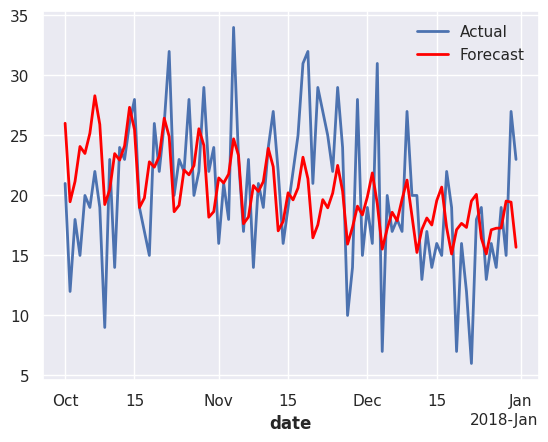

In [ ]:
from darts.models import RNNModel

from darts.utils.timeseries_generation import datetime_attribute_timeseries

# Масштабування даних
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

display(series)

# Побудова та тренування моделі LSTM
model = RNNModel(
    model="LSTM",
    input_chunk_length=14,
    hidden_dim=20,
    dropout=0,
    batch_size=16,
    n_epochs=100,
    optimizer_kwargs={"lr": 1e-3},
    log_tensorboard=True,
    random_state=42,
    training_length=20,
    force_reset=True,
)
model.fit(
    train_transformed,
    val_series=val_transformed,
    verbose=True)

# Прогнозування
forecast = scaler.inverse_transform(model.predict(len(val)))

# Візуалізація результатів
val.plot(label='Actual')
forecast.plot(label='Forecast', color='red')
plt.legend()
plt.show()

In [ ]:
eval_forecast(model, val, forecast)

model RNNModel(model=LSTM, hidden_dim=20, training_length=20, input_chunk_length=14, batch_size=16, n_epochs=100, optimizer_kwargs={'lr': 0.001}, log_tensorboard=True, random_state=42, force_reset=True) obtains MAPE: 26.16%


26.164396445658785

<font color='green'> Якість цієї моделі доволі непогана, але Prohet виявився більш точним. </font>

16. Виконайте бектест для тої моделі, яка виявилась найкращою у вашому дослідженні на періоді 1 рік з передбаченнями на 1 місяць щоразу. Візуалізуйте як поводилась модель протягом бектесту, яка була точність?

In [ ]:
hfc_params = {
    "series": series,
    "start": pd.Timestamp("2016-12-01"),
    "forecast_horizon": 30,
    "verbose": False,
}

historical_fcast = model_prophet.historical_forecasts(last_points_only=True, **hfc_params)

historical forecasts:   0%|          | 0/367 [00:00<?, ?it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9t7gzswa/f4ntlj9e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9t7gzswa/3s6yoq6x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70576', 'data', 'file=/tmp/tmp9t7gzswa/f4ntlj9e.json', 'init=/tmp/tmp9t7gzswa/3s6yoq6x.json', 'output', 'file=/tmp/tmp9t7gzswa/prophet_modelx6zh6nls/prophet_model-20250316225247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:52:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:52:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
historical forecasts:   0%|          | 1/367 [00:00<01:55,  3.17it/s]INFO:prophet

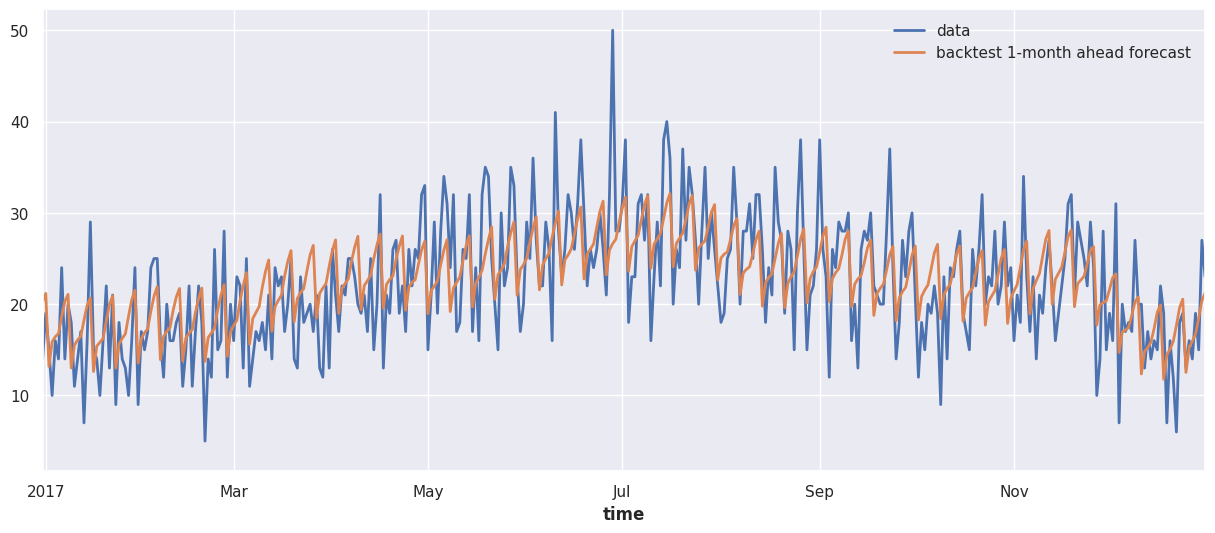

MAPE = 21.18%


In [ ]:
plt.figure(figsize=(15, 6))
series.plot(label="data")
historical_fcast.plot(label="backtest 1-month ahead forecast")
plt.xlim([pd.Timestamp("2016-12-31"), pd.Timestamp("2017-12-31")])
plt.legend()
plt.show()

print(f"MAPE = {mape(series, historical_fcast):.2f}%")

17. На цьому етапі ви зрозуміли, як моделювати продажі одного айтему з 1 магазину. Як би ви підійшли до задачі прогнозування продажів в наступному місяці для кожного з 50 айтемів в кожному з 10 магазинів? Опишіть загальний підхід
- яку модель ви б використали
- скільки моделей ви б тренували
- обгрунтуйте свій вибір.

<font color='green'> Один з підходів, який можна було б спробувати - використання Prophet для кожного товару в кожному магазині. Тобто 500 моделей, які достатньо швидко тренуються і точність для кожної індивідуальної моделі мала б бути вище. Можна також було б спробувати натренувати одну глобальну модель, яка підтримує багато часових рядів одночасно (наприклад, XGBoost) - це може бути простіше у використанні. </font>